In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import envpool

In [4]:
env1 = envpool.make_gymnasium('Breakout-v5', num_envs=64, stack_num=1)
env1.reset();

t0 = time.time()
for i in tqdm(range(1000)):
    env1.step(np.random.randint(0, 18, size=64))
t1 = time.time()
print((1000*64)/(t1-t0), 'SPS')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.60it/s]

8223.00087390009 SPS


In [73]:
env = make_env(n_envs=64)
env.reset();

envpool found!


In [74]:
buffer = Buffer(256, 64, env, device='cpu')
agent = RandomAgent(18)

KeyError: 'obs'

In [ ]:
%%time
buffer.collect(agent, 4)

In [69]:
%%time
for i in range(256):
    env.step(np.random.randint(0, 18, size=64))

CPU times: user 44.3 s, sys: 210 ms, total: 44.5 s
Wall time: 3.4 s


In [72]:
%%time
for i in range(256):
    env1.step(np.random.randint(0, 18, size=64))

CPU times: user 32.2 s, sys: 81.1 ms, total: 32.3 s
Wall time: 2.25 s


In [77]:
env = envpool.make_gymnasium('Breakout-v5', num_envs=64, stack_num=1)
env.observation_space = None

AttributeError: property 'observation_space' of 'AtariGymnasiumEnvPool' object has no setter

In [23]:
%%time
def make_env_single(env_id="Breakout", frame_stack=4):
    env = gym.make(f"ALE/{env_id}-v5", frameskip=1, full_action_space=True)
    # TODO: reduce space of actions
    env = gym.wrappers.AtariPreprocessing(env, terminal_on_life_loss=True)
    env = gym.wrappers.FrameStack(env, num_stack=frame_stack)
    return env
make_fn = partial(make_env_single, env_id='Breakout', frame_stack=4)
make_fns = [make_fn for _ in range(64)]
env2 = gym.vector.SyncVectorEnv(make_fns)

CPU times: user 12.5 s, sys: 88.1 ms, total: 12.6 s
Wall time: 12.6 s


In [24]:
%%time
env2.reset()
for i in tqdm(range(1000)):
    env2.step(np.random.randint(0, 15, size=64))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.66it/s]

CPU times: user 1min 44s, sys: 171 ms, total: 1min 44s
Wall time: 1min 44s


In [6]:
%%time
env1 = envpool.make('Breakout-v5', env_type='gym', num_envs=256, stack_num=4, batch_size=64, num_threads=64)

CPU times: user 1min 33s, sys: 211 ms, total: 1min 33s
Wall time: 2.76 s


In [ ]:
%%time
env1.reset()
for i in tqdm(range(1000)):
    env1.step(np.random.randint(0, 15, size=64))
    

  0%|                                                                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]

In [31]:
2048*512*84*84/1e9

7.398752256

In [47]:
torch.arange(64)%32

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [17]:
env1 = envpool.make('Breakout-v5', env_type='gym', num_envs=8, stack_num=4, seed=0,
                    noop_max=30, episodic_life=False, full_action_space=True, use_fire_reset=False, )
obs = env1.reset()



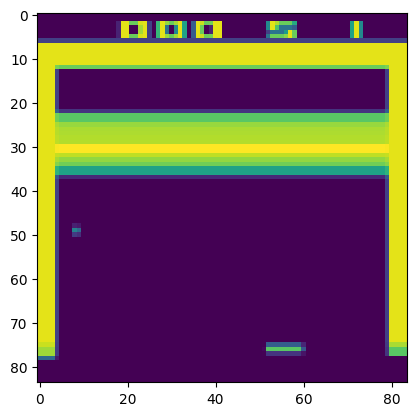

In [23]:
plt.imshow(obs[0, -1])

In [ ]:
episodic_life (bool): make end-of-life == end-of-episode, but only reset on true game over. It helps the value estimation. Default to False;
zero_discount_on_life_loss (bool): when the agent losses a life, the discount in dm_env.TimeStep is set to 0. This option doesn’t affect gym’s behavior (since there is no discount field in gym’s API). Default to False;
reward_clip (bool): whether to change the reward to sign(reward), default to False;
repeat_action_probability (float): the action repeat probability in ALE configuration, default to 0 (no action repeat to perform deterministic result);
use_inter_area_resize (bool): whether to use cv::INTER_AREA for image resize, default to True.

In [50]:
envs = []
for i in tqdm(range(10)):
    env = envpool.make('Breakout-v5', env_type='gym', num_envs=8, stack_num=4)
    envs.append(env)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.34it/s]


In [1]:
import train_dt2

/data/vision/phillipi/akumar01/miniconda3/envs/egb/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
args = train_dt2.parse_args('--device cuda'.split())
print(args)

Namespace(batch_size=1024, collect_size=8192, ctx_len=4, device='cpu', ent_coef=0.01, entity=None, env_id='Pong', frame_stack=4, freq_collect=10, gamma=0.99, load_agent=None, log_video=False, lr=0.0006, lr_min=6e-05, lr_schedule=True, max_grad_norm=0.5, n_envs=64, n_iters=1000, n_steps=128, name=None, obj='ext', project=None, save_agent=None, seed=0, torch_deterministic=True, track=False)


In [ ]:
train_dt2.main(args)

Printing DTGPT Summary...
125571
num decayed parameter tensors: 12, with 125,312 parameters
num non-decayed parameter tensors: 10, with 259 parameters
using fused AdamW: False


A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
  0%|                                                                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]

collect: dt_const=0.083, dt_inf=0.317, dt_env=0.989
collect: dt_const=0.037, dt_inf=0.247, dt_env=0.952
collect: dt_const=0.031, dt_inf=0.238, dt_env=0.760
collect: dt_const=0.031, dt_inf=0.238, dt_env=0.818


In [1]:
from collections import deque

In [3]:
d = deque(maxlen=10)

In [4]:
for i in range(20):
    d.append(i)
    print(d)

deque([0], maxlen=10)
deque([0, 1], maxlen=10)
deque([0, 1, 2], maxlen=10)
deque([0, 1, 2, 3], maxlen=10)
deque([0, 1, 2, 3, 4], maxlen=10)
deque([0, 1, 2, 3, 4, 5], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)
deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], maxlen=10)
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], maxlen=10)
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], maxlen=10)
deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], maxlen=10)
deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14], maxlen=10)
deque([6, 7, 8, 9, 10, 11, 12, 13, 14, 15], maxlen=10)
deque([7, 8, 9, 10, 11, 12, 13, 14, 15, 16], maxlen=10)
deque([8, 9, 10, 11, 12, 13, 14, 15, 16, 17], maxlen=10)
deque([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], maxlen=10)
deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)


In [48]:
import time
from contextlib import contextmanager
from collections import defaultdict

class Timer:
    def __init__(self):
        self.times = defaultdict(float)
        
    @contextmanager
    def time(self, key):
        before = time.time()
        yield None
        time.time()
        self.times[key] += (time.time()-before)
        
    
timer = Timer()
with timer.time('env') as f:
    print(f)
    time.sleep(1.)
    print('lalalla')

None
lalalla


In [49]:
timer.times

defaultdict(float, {'env': 1.0024609565734863})

In [144]:
a = deque(maxlen=5)
a.append(np.zeros(3))
a.append(np.zeros(3))

In [146]:
np.stack(a).shape

(2, 3)

([1, 2, 3, 4], deque([1, 2, 3, 4, 5], maxlen=5))

In [96]:
import gymnasium as gym
import gymnasium.wrappers.normalize as normalize



In [132]:
norm = normalize.RunningMeanStd(shape=10)

In [133]:
norm.update(np.ones((10)))

In [134]:
norm.mean

array([0.99999, 0.99999, 0.99999, 0.99999, 0.99999, 0.99999, 0.99999,
       0.99999, 0.99999, 0.99999])

In [135]:
norm.count

10.0001

In [147]:
import wandb

In [151]:
vid = np.random.randint(0, 255, size=(100, 84, 84)).astype(np.uint8)
wandb.Video(vid)

ValueError: Video must be atleast 4 dimensions: time, channels, height, width

In [152]:
wandb.__version__

'0.15.4'

In [166]:
torch.manual_seed(0)

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


class Agent(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            layer_init(nn.Conv2d(4, 32, 8, stride=4)),
            nn.ReLU(),
            layer_init(nn.Conv2d(32, 64, 4, stride=2)),
            nn.ReLU(),
            layer_init(nn.Conv2d(64, 64, 3, stride=1)),
            nn.ReLU(),
            nn.Flatten(),
            layer_init(nn.Linear(64 * 7 * 7, 512)),
            nn.ReLU(),
        )
        self.actor = layer_init(nn.Linear(512, 18), std=0.01)
        self.critic = layer_init(nn.Linear(512, 1), std=1)

    def get_value(self, x):
        return self.critic(self.network(x / 255.0))

    def get_action_and_value(self, x, action=None):
        hidden = self.network(x / 255.0)
        logits = self.actor(hidden)
        probs = Categorical(logits=logits)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action), probs.entropy(), self.critic(hidden)
    
agent = Agent()
np.array([p.sum().item() for p in agent.parameters()])

array([ -1.93428278,   0.        ,   8.6830616 ,   0.        ,
        -6.88403606,   0.        , -10.22880268,   0.        ,
         0.03645384,   0.        ,  -0.85234404,   0.        ])

In [168]:
torch.manual_seed(0)

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


class Agent(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(4, 32, 8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 512),
            nn.ReLU(),
        )
        self.actor = nn.Linear(512, 18)
        self.critic = nn.Linear(512, 1)

    def get_value(self, x):
        return self.critic(self.network(x / 255.0))

    def get_action_and_value(self, x, action=None):
        hidden = self.network(x / 255.0)
        logits = self.actor(hidden)
        probs = Categorical(logits=logits)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action), probs.entropy(), self.critic(hidden)
    
agent = Agent()
np.array([p.sum().item() for p in agent.parameters()])

array([-1.01812518e+00, -1.39392614e-01,  6.56081009e+00,  1.15206823e-01,
       -3.90144610e+00,  3.45844626e-01, -1.82324791e+00, -8.67850184e-02,
        6.26007002e-03,  0.00000000e+00, -3.47416848e-01,  0.00000000e+00])

In [217]:
import gym.wrappers.normalize

In [253]:
rms = gym.wrappers.normalize.RunningMeanStd()
rms.update(np.full(100, fill_value=1))
print((1-rms.mean)/(np.sqrt(rms.var)+1e-6))
print((100-rms.mean)/(np.sqrt(rms.var)+1e-6))
rms.update(np.full(1, fill_value=100))
print((1-rms.mean)/(np.sqrt(rms.var)+1e-6))
print((100-rms.mean)/(np.sqrt(rms.var)+1e-6))

0.0007066069574991711
69954.15944962457
-0.09999983674737523
10.00000387674515


In [262]:
a = torch.randn(10)

In [7]:
import torch

In [18]:
from timers import Timer
from buffers2 import Buffer
buffer = Buffer(64, 256, None, device='mps')

In [24]:
# %%timeit
timer = Timer()

for i in range(256):
    with timer.add_time('construct'):
        buffer._construct_agent_input(i, 32)
print(dict(timer.key2time))

{'construct': 0.09844613075256348}


In [25]:
t = []
for i in range(256):
    timer = Timer()
    with timer.add_time('construct'):
        buffer._construct_agent_input(i, 32)
    t.append(timer.key2time['construct'])

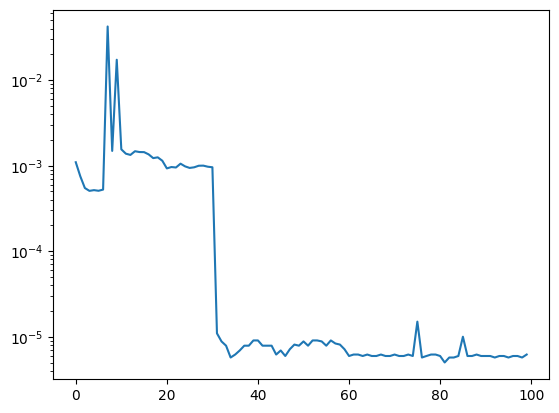

In [30]:
plt.plot(t[:100])
plt.yscale('log')

In [40]:
for i in range(1, 610):
    if i%(610//10)==0:
        print(i, i//(610//10))

61 1
122 2
183 3
244 4
305 5
366 6
427 7
488 8
549 9


In [41]:
wandb.init()

wandb: Currently logged in as: akarshkumar0101. Use `wandb login --relogin` to force relogin


In [45]:
wandb.log(dict(hello=5), step=20)

In [31]:
buffer.obss = torch.arange(32).repeat(1, 1)
buffer.acts = torch.arange(32).repeat(1, 1)

In [39]:
for i in range(20):
    print(buffer._construct_agent_input(i, 5)['obs'][0])
    print(buffer._construct_agent_input(i, 5)['act'][0])
    print(buffer._construct_agent_input(i, 5)['rew'][0])
    print()

tensor([28, 29, 30, 31,  0])
tensor([28, 29, 30, 31])
tensor([0., 0., 0., 0.])

tensor([29, 30, 31,  0,  1])
tensor([29, 30, 31,  0])
tensor([0., 0., 0., 0.])

tensor([30, 31,  0,  1,  2])
tensor([30, 31,  0,  1])
tensor([0., 0., 0., 0.])

tensor([31,  0,  1,  2,  3])
tensor([31,  0,  1,  2])
tensor([0., 0., 0., 0.])

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3])
tensor([0., 0., 0., 0.])

tensor([1, 2, 3, 4, 5])
tensor([1, 2, 3, 4])
tensor([0., 0., 0., 0.])

tensor([2, 3, 4, 5, 6])
tensor([2, 3, 4, 5])
tensor([0., 0., 0., 0.])

tensor([3, 4, 5, 6, 7])
tensor([3, 4, 5, 6])
tensor([0., 0., 0., 0.])

tensor([4, 5, 6, 7, 8])
tensor([4, 5, 6, 7])
tensor([0., 0., 0., 0.])

tensor([5, 6, 7, 8, 9])
tensor([5, 6, 7, 8])
tensor([0., 0., 0., 0.])

tensor([ 6,  7,  8,  9, 10])
tensor([6, 7, 8, 9])
tensor([0., 0., 0., 0.])

tensor([ 7,  8,  9, 10, 11])
tensor([ 7,  8,  9, 10])
tensor([0., 0., 0., 0.])

tensor([ 8,  9, 10, 11, 12])
tensor([ 8,  9, 10, 11])
tensor([0., 0., 0., 0.])

tensor([ 9, 10, 11

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

envpool found!


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
from buffers2 import Buffer
from ppo_rnd_envpool import Agent

In [23]:
env = make_env('BeamRider', n_envs=128, obj='ext', device='cpu')
buffer = Buffer(128, 128, env, device='cpu')
agent = Agent(env)

In [24]:
%prun buffer.collect(agent, 4)

Collection time breakdown:
construct_agent_input         : 0.005
agent_inference               : 8.747
env_step                      : 1.683
 

         45639 function calls (43016 primitive calls) in 10.515 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      387    7.400    0.019    7.400    0.019 {built-in method torch.conv2d}
      128    1.595    0.012    1.600    0.013 envpool.py:124(recv)
      774    1.010    0.001    1.010    0.001 {built-in method torch._C._nn.linear}
      129    0.222    0.002    8.744    0.068 ppo_rnd_envpool.py:213(forward)
      903    0.073    0.000    0.073    0.000 {built-in method torch.relu}
      128    0.044    0.000    0.046    0.000 envpool.py:114(send)
        1    0.032    0.032   10.514   10.514 buffers2.py:45(collect)
      128    0.013    0.000    0.013    0.000 {built-in method torch.multinomial}
      128    0.013    0.000    0.013    0.000 {method 'logsumexp' of 'torch._C._TensorBase' objects}
      128    0.011    0.000    1.679    0.013 env_atari.py:196(step)
      128    0.008    0.000    1.665    0.013 env_atari

In [113]:
3+1+1+4+4

13

In [107]:
logits = torch.randn(100, 10)

In [114]:
a = torch.log_softmax(logits, dim=-1)
b = torch.log_softmax(logits*1e6, dim=-1)

torch.nn.functional.kl_div(a, b, log_target=True, reduction='none').mean()

tensor(0.1144)

In [62]:
num_envs = 32
env = envpool.make('Breakout-v5', 'gym', num_envs=num_envs, reward_clip=True, full_action_space=False)
obs = env.reset()
obss = []
rews = []
for i in tqdm(range(1000)):
    action = np.array([env.action_space.sample() for _ in range(num_envs)])
    obs, rew, done, info = env.step(action)
    obss.append(obs)
    rews.append(rew)
    # assert (rew==info['reward']).all()
obss = np.stack(obss)
rews = np.stack(rews)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 215.45it/s]


In [63]:
np.mean(rews)

0.00709375

In [45]:
rew, info['reward']

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

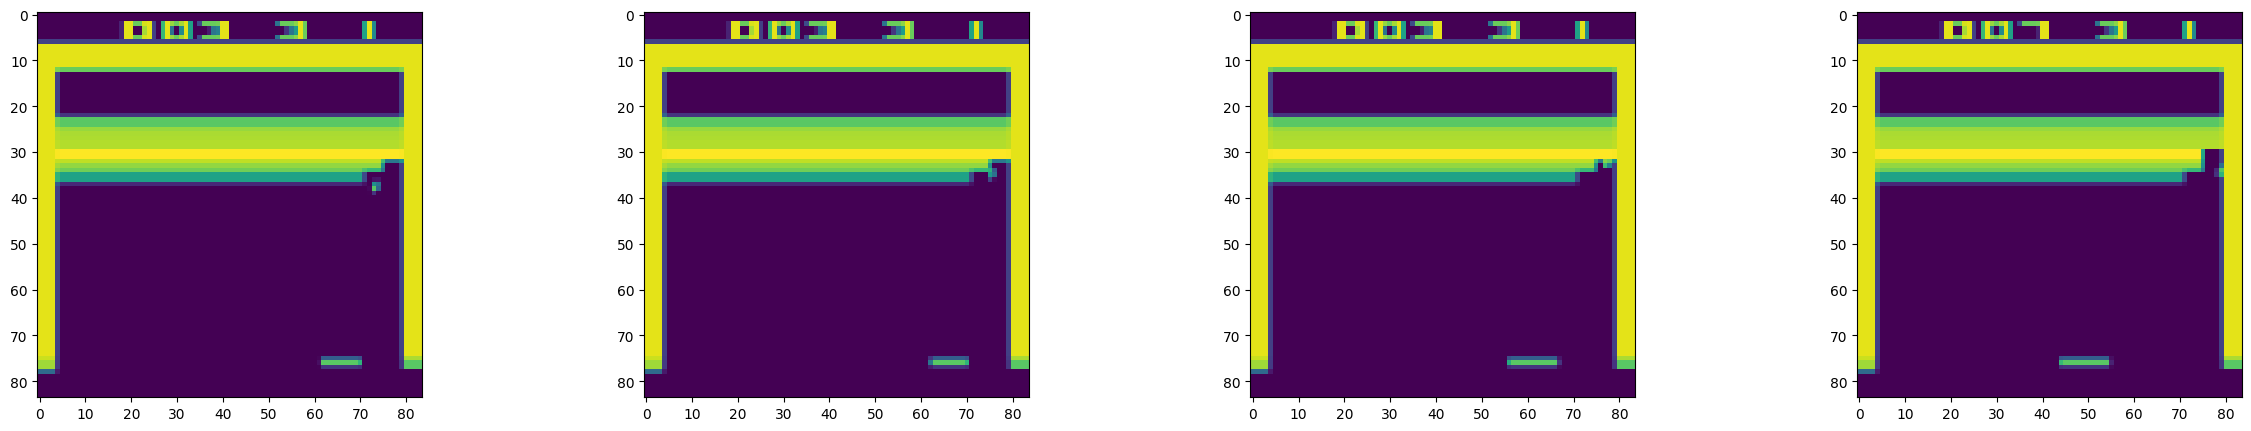

In [50]:
plt.figure(figsize=(30, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(obs[24, i])
plt.show()

In [64]:
obss.shape

(1000, 32, 4, 84, 84)

In [71]:
a = obss[[497, 498, 499, 500], :, -1]
b = obss[500, :, :]
a = rearrange(a, 't b h w -> b t h w')
a.shape, b.shape

((32, 4, 84, 84), (32, 4, 84, 84))

In [214]:
torch.manual_seed(0)
logits = torch.randn(100, 10)
dist = torch.distributions.Categorical(logits=logits)
logits = dist.logits

In [215]:
torch.nn.functional.kl_div(logits, (logits*1e6).log_softmax(dim=-1), log_target=True, reduction='none').mean().item()

0.11285175383090973

In [217]:
import wandb

In [237]:
api = wandb.Api()

False

In [285]:
i = 0
for run in api.runs('akarshkumar0101/egb-atari'):
    # print(run.created_at[:10]>'2023-06-13', run.name)
    if run.created_at[:10]>'2023-06-13':
        i += 1
        # print(i, run.name)
        try:
            print(run.summary['_step'])
        except Exception as e:
            print(run.name)

19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
specialist_StarGunner_rnd_0
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
specialist_BankHeist_rnd_0
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480
19988480


In [334]:
from env_atari import make_env

In [375]:
env = make_env('ChopperCommand', n_envs=32, obj='ext', gamma=0.99, seed=0, full_action_space=False)

In [376]:
obs, info = env.reset()
for _ in tqdm(range(2048)):
    obs, rew, term, trunc, info = env.step(env.action_space.sample())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:08<00:00, 240.60it/s]


800.0


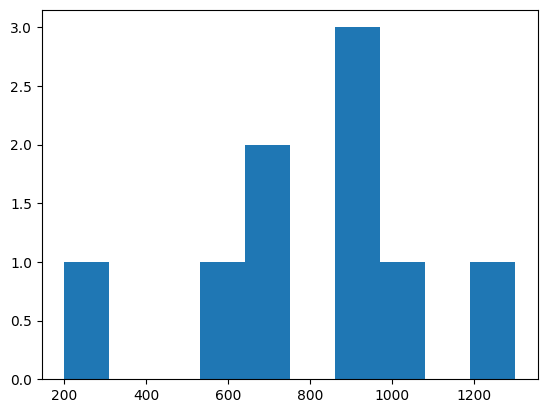

In [377]:
plt.hist(env.get_past_returns()['ret_score'].numpy())
print(env.get_past_returns()['ret_score'].numpy().mean())

In [385]:
with open('atari_games_41.txt', 'r') as f:
    lines = f.readlines()
lines = [line.strip() for line in lines]

In [388]:
import atari_data

In [394]:
for line in lines:
    if not atari_data.process_env_id(line) in atari_data.ATARI_GAMES:
        print(line)
        

Carnival
Pooyan


In [40]:
from agent_atari import NatureCNNAgent, DecisionTransformer
from env_atari import make_env
from buffers import Buffer

In [41]:
agent1 = NatureCNNAgent(18, 4)
agent2 = DecisionTransformer(18, 4)

obs = torch.randn(16, 4, 1, 84, 84)
act = torch.randint(0, 18, (16, 4))

logits, values = agent1(done=None, obs=obs, act=act, rew=None)
print(logits.shape, values.shape)
logits, values = agent2(done=None, obs=obs, act=act, rew=None)
print(logits.shape, values.shape)

torch.Size([16, 1, 18]) torch.Size([16, 1])
torch.Size([16, 4, 18]) torch.Size([16, 4])


In [42]:
env = make_env('Breakout', n_envs=16, obj='ext', device=None, seed=0)
buffer = Buffer(16, 128, env, device=None)

In [43]:
%%time
buffer.collect(agent1, 4)

CPU times: user 2.47 s, sys: 10.8 ms, total: 2.49 s
Wall time: 1.47 s


In [44]:
%%time
buffer.collect(agent2, 4)

CPU times: user 8 s, sys: 24.6 ms, total: 8.03 s
Wall time: 7.01 s


In [62]:
a = np.eye(100)
b = np.zeros((100, 100))
b[np.arange(0, 50), 0] = 1.
b[np.arange(50, 100), 1] = 1.
a, b

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]))

In [63]:
np.var(a), np.var(b)

(0.0099, 0.0099)

In [65]:
# print(np.var(a, axis=0), np.var(b, axis=0))
print(np.var(a, axis=0).mean(), np.var(b, axis=0).mean())

0.009899999999999994 0.005


In [66]:
print(np.var(a, axis=0).mean()/np.var(b, axis=0).mean())

1.9799999999999986


In [77]:
a = np.zeros((100, 100, 100))

for i in range(0, 100):
    idx = np.random.randint(0, i+1, 100)
    a[i, np.arange(100), idx] = 1.

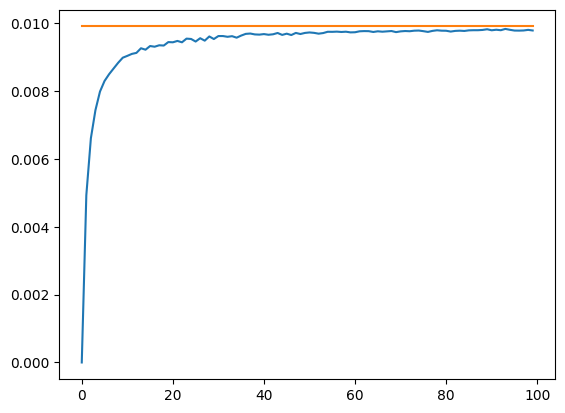

In [92]:
plt.plot(np.var(a, axis=1).mean(axis=-1))
plt.plot(np.var(a, axis=2).mean(axis=-1))

In [117]:
env = envpool.make_gymnasium(
    task_id=f"{'MontezumaRevenge'}-v5",
    num_envs=32,
    seed=0,  # default: 42
    noop_max=500,  # default: 30
    episodic_life=True,  # default: False
    reward_clip=True,  # default: False
    full_action_space=True,  # default: False
)

In [118]:
obs, info = env.reset()

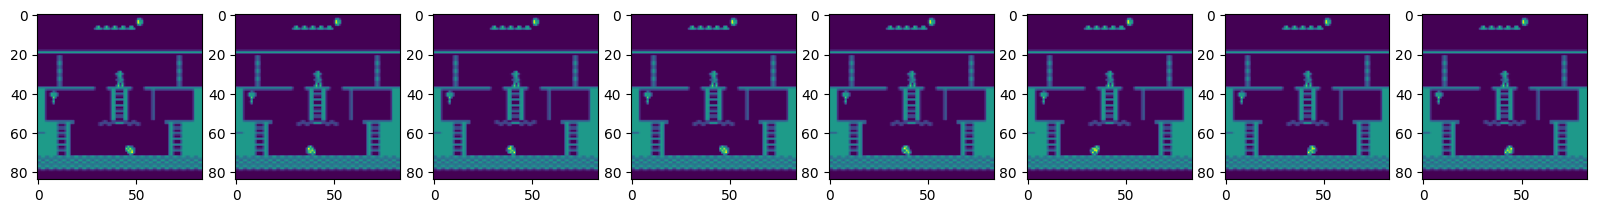

In [119]:
plt.figure(figsize=(20, 5))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(obs[i, 0])
plt.show()

In [163]:
y_pred, y_true = np.ones(100), np.zeros(100)
var_y = np.var(y_true)
explained_var = 1 - np.var(y_true - y_pred) / var_y

/tmp/ipykernel_88/2360968120.py:3: RuntimeWarning: invalid value encountered in scalar divide
  explained_var = 1 - np.var(y_true - y_pred) / var_y


In [159]:
explained_var

nan

In [162]:
1 - np.var(y_true - y_pred) / var_y

/tmp/ipykernel_88/1870206349.py:1: RuntimeWarning: invalid value encountered in scalar divide
  1 - np.var(y_true - y_pred) / var_y


nan

In [164]:
import argparse

In [173]:
parser = argparse.ArgumentParser()
parser.add_argument("--track", type=lambda x: bool(strtobool(x)), default=False)
parser.add_argument("--entity", type=str, default=None, help="the entity (team) of wandb's project")
parser.add_argument("--project", type=str, default=None, help="the wandb's project name")
parser.add_argument("--name", type=str, default=None, help="the name of this experiment")
parser.add_argument("--log-video", type=lambda x: bool(strtobool(x)), default=False)

_StoreAction(option_strings=['--log-video'], dest='log_video', nargs=None, const=None, default=False, type=<function <lambda> at 0x7fff19880700>, choices=None, required=False, help=None, metavar=None)

In [175]:
parser.parse_known_args('--wtf=hello'.split())

(Namespace(track=False, entity=None, project=None, name=None, log_video=False),
 ['--wtf=hello'])

In [176]:
buffer.obss.shape

torch.Size([16, 128, 1, 84, 84])

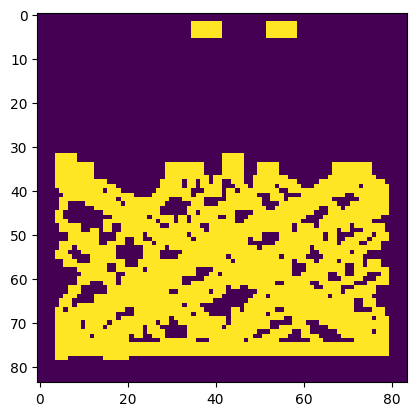

In [188]:
plt.imshow(buffer.obss.float().var(dim=(0, 1))[0].numpy()>0)

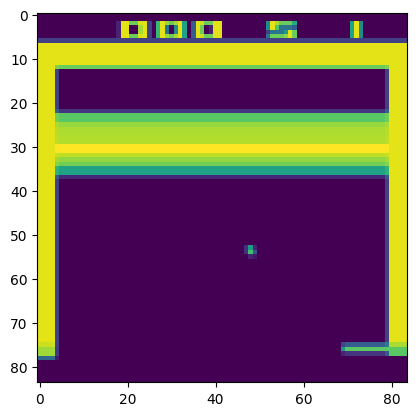

In [185]:
plt.imshow(buffer.obss[0, 0, 0].numpy())

In [52]:
from agent_atari import NatureCNN, IDM

In [56]:
env = make_env(env_id='MontezumaRevenge', n_envs=32, full_action_space=False)
buffer = Buffer(32, 256, env)
agent = RandomAgent(env.single_action_space.n)
idm = IDM(env.single_action_space.n, n_dim=32, normalize=True)

fan_in
fan_in
fan_in
fan_in
fan_in
fan_in


In [57]:
opt = torch.optim.Adam(idm.parameters(), lr=3e-4)

  0%|                                                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

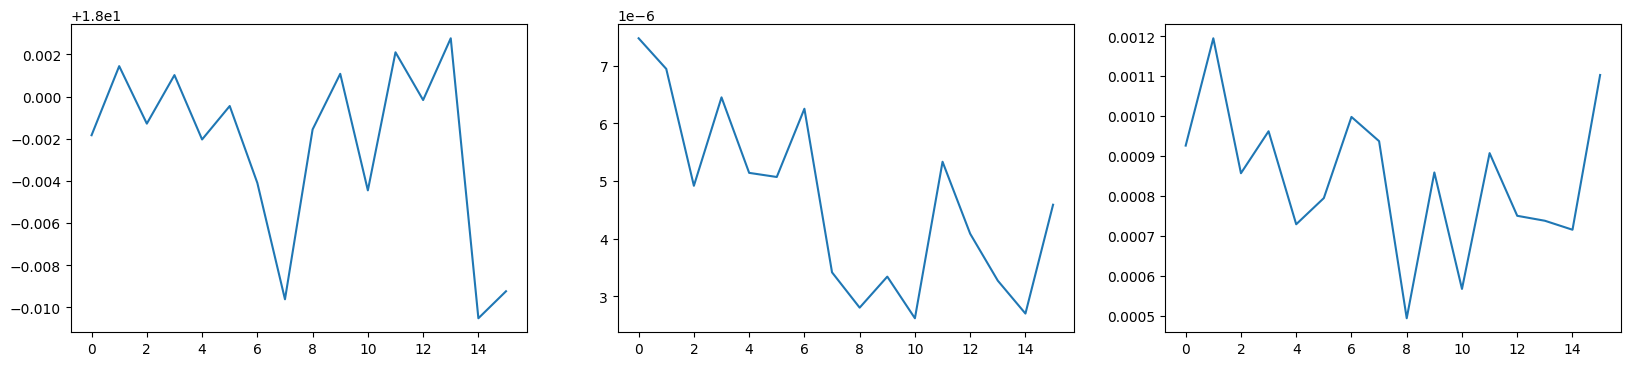

  1%|██                                                                                                                                                                                                              | 1/100 [00:17<29:41, 18.00s/it]

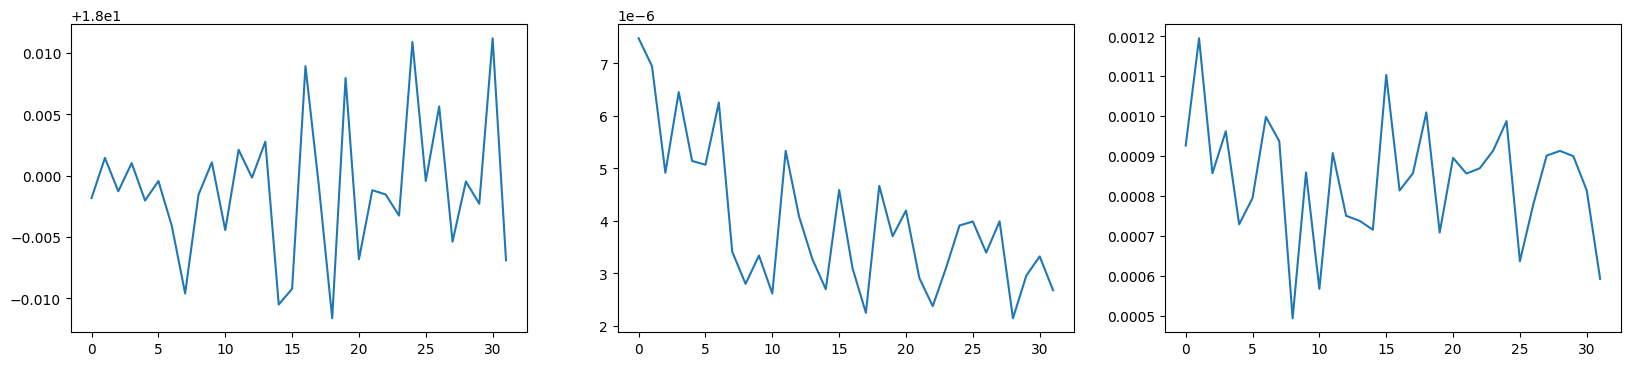

  2%|████▏                                                                                                                                                                                                           | 2/100 [00:36<29:37, 18.14s/it]

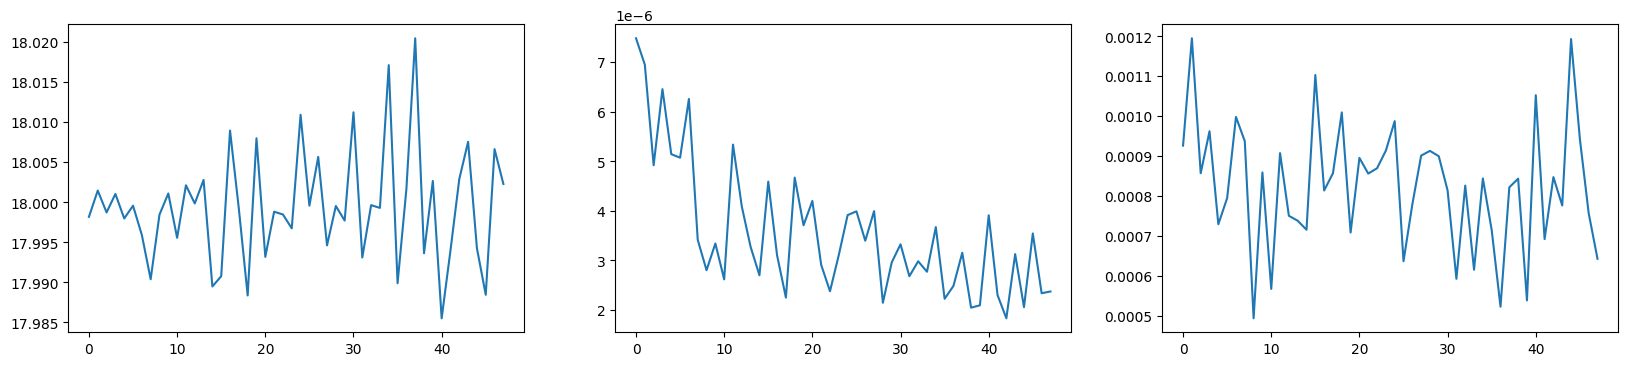

  3%|██████▏                                                                                                                                                                                                         | 3/100 [00:54<29:18, 18.13s/it]

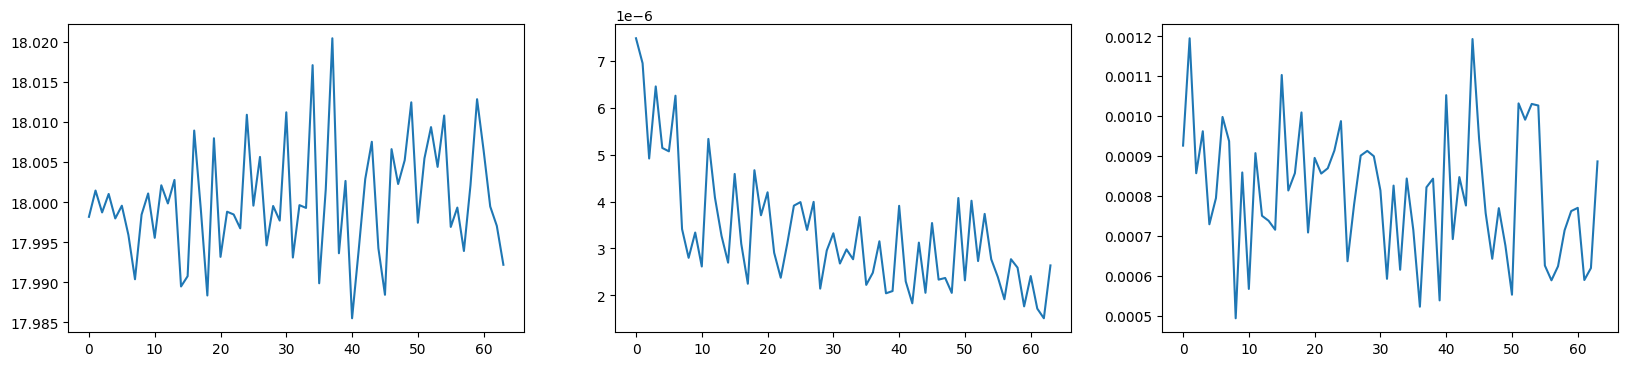

  4%|████████▎                                                                                                                                                                                                       | 4/100 [01:12<29:04, 18.17s/it]

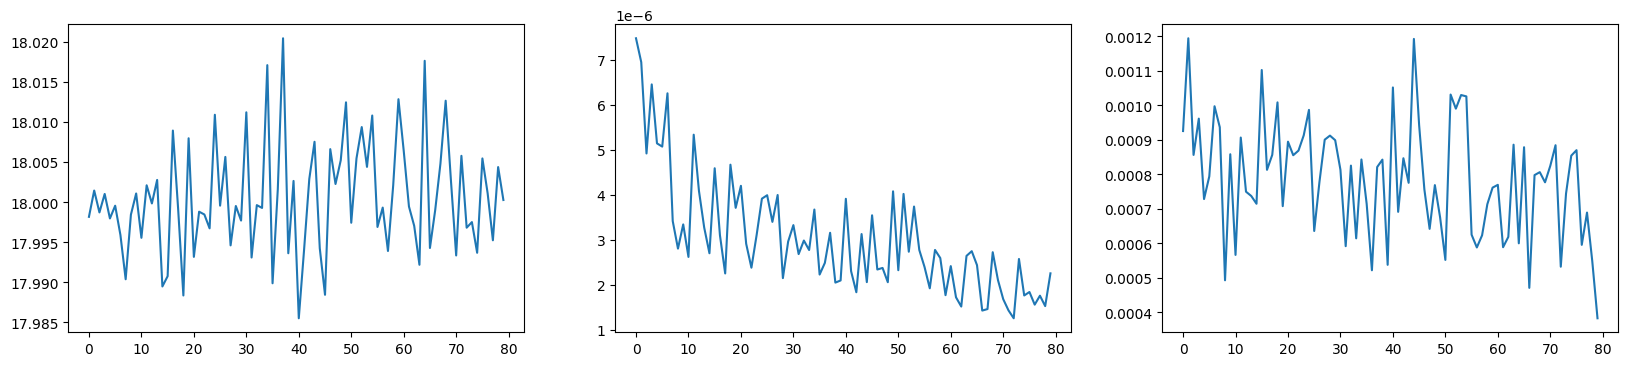

  5%|██████████▍                                                                                                                                                                                                     | 5/100 [01:35<30:10, 19.05s/it]


KeyboardInterrupt: 

In [58]:
losses = []
grad1, grad2 = [], []
for i in tqdm(range(100)):
    buffer.collect(agent, 1)
    for _ in range(16):
        batch = buffer.generate_batch(512, 2)
        obs, act = batch['obs'], batch['act']
        logits = idm.predict_action(obs[:, 0], obs[:, 1])
        loss = torch.nn.functional.cross_entropy(logits, act[:, 0], reduction='none').mean()
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(np.e**loss.item())
        grad1.append(idm.encoder.network[0].weight.grad.abs().mean().item())
        grad2.append(idm.idm[2].weight.grad.abs().mean().item())
    plt.figure(figsize=(20, 4))
    plt.subplot(131)
    plt.plot(losses)
    plt.subplot(132)
    plt.plot(grad1)
    plt.subplot(133)
    plt.plot(grad2)
    plt.show()

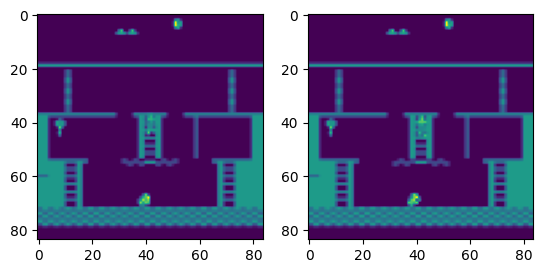

In [120]:
plt.subplot(121); plt.imshow(obs[1, 0, 0])
plt.subplot(122); plt.imshow(obs[1, 1, 0])

In [125]:
act2str = {
0: "NOOP",
1: "FIRE",
2: "UP",
3: "RIGHT",
4: "LEFT",
5: "DOWN",
6: "UPRIGHT",
7: "UPLEFT",
8: "DOWNRIGHT",
9: "DOWNLEFT",
10: "UPFIRE",
11: "RIGHTFIRE",
12: "LEFTFIRE",
13: "DOWNFIRE",
14: "UPRIGHTFIRE",
15: "UPLEFTFIRE",
16: "DOWNRIGHTFIRE",
17: "DOWNLEFTFIRE",
}

DOWNLEFTFIRE


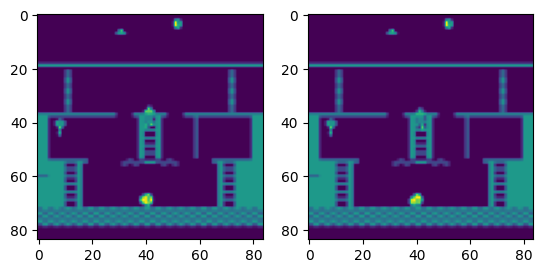

DOWNFIRE


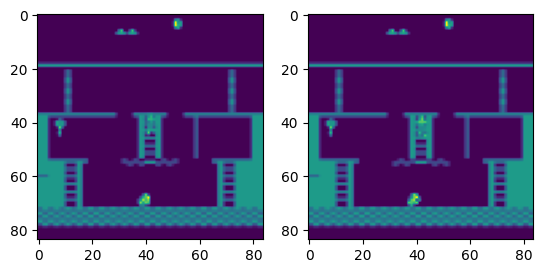

LEFTFIRE


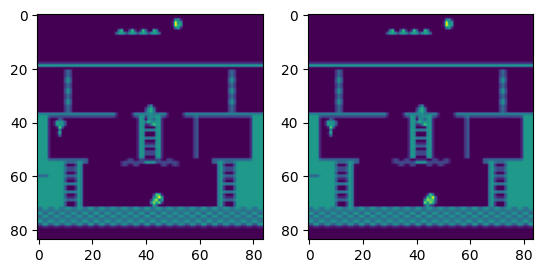

UPLEFT


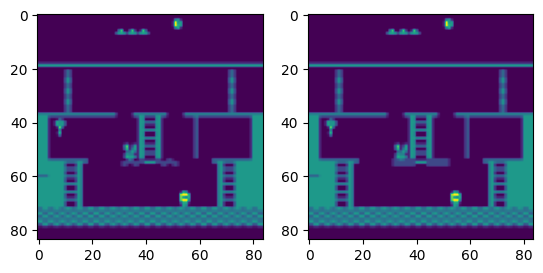

DOWN


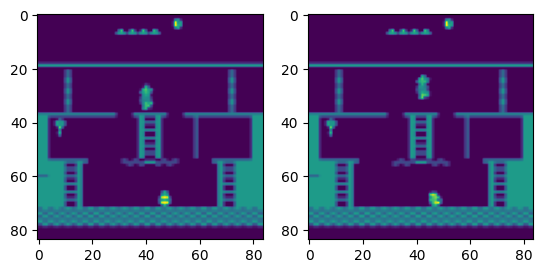

DOWNLEFT


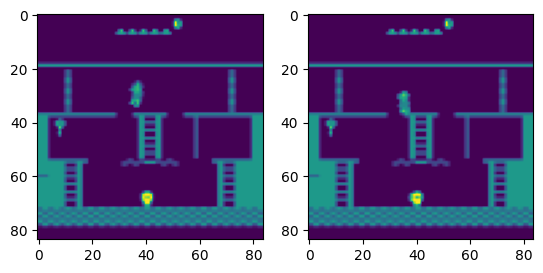

NOOP


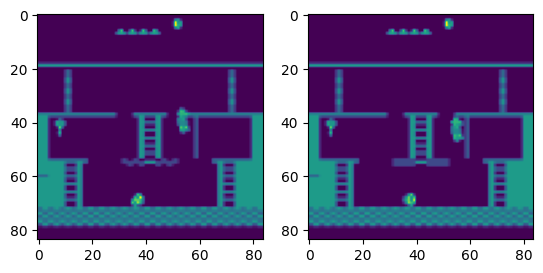

UP


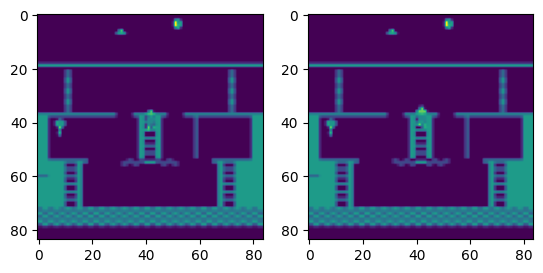

UPRIGHTFIRE


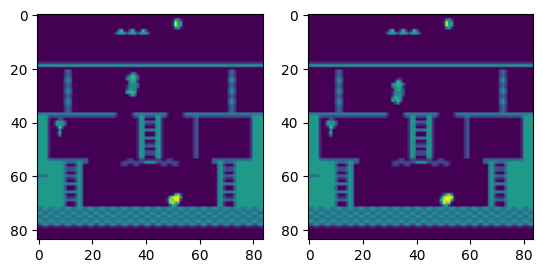

FIRE


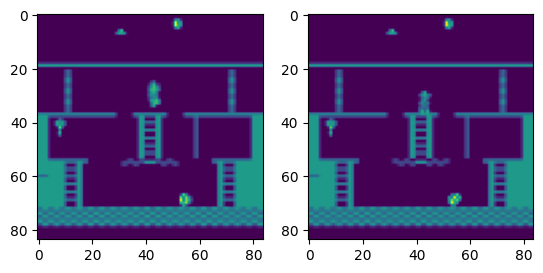

FIRE


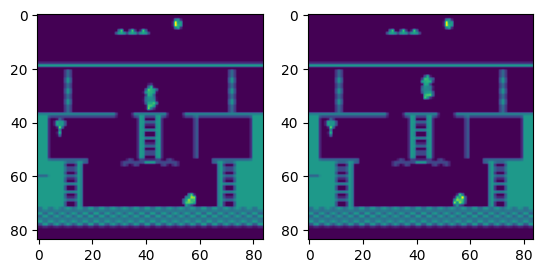

LEFT


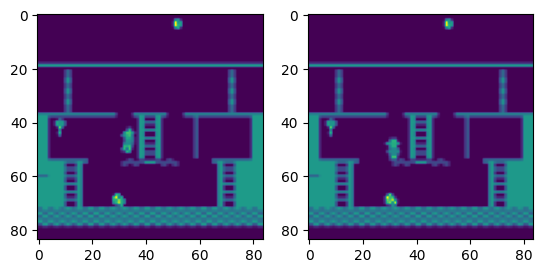

DOWNLEFTFIRE


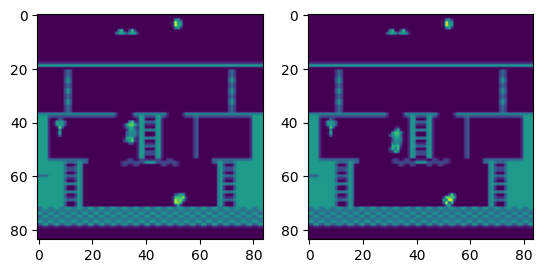

RIGHTFIRE


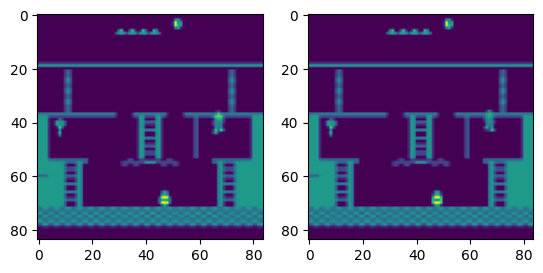

RIGHT


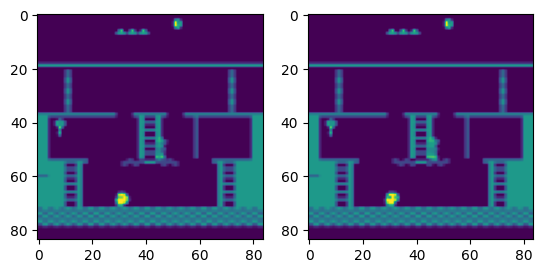

LEFTFIRE


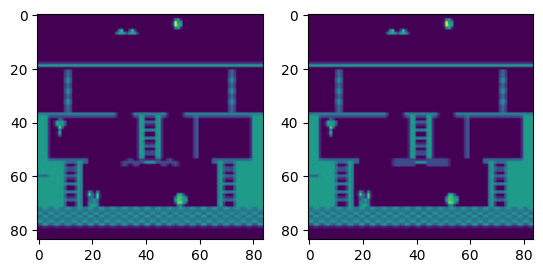

UPLEFT


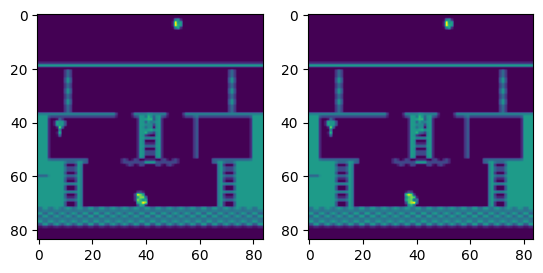

RIGHTFIRE


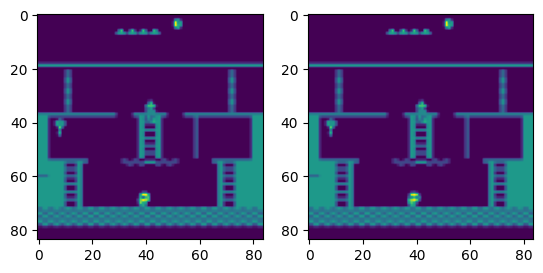

UPLEFTFIRE


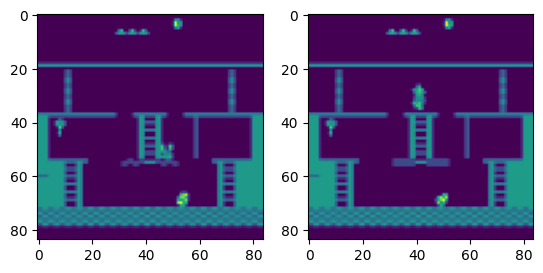

UPFIRE


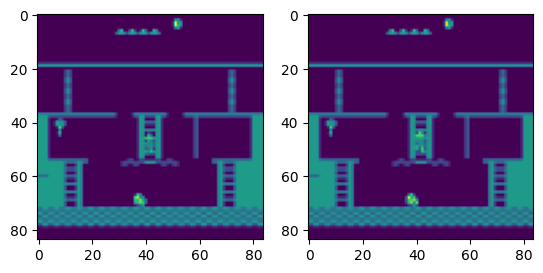

In [127]:
for i in range(20):
    print(act2str[act[i, 0].item()])
    plt.subplot(121); plt.imshow(obs[i, 0, 0])
    plt.subplot(122); plt.imshow(obs[i, 1, 0])
    plt.show()

In [132]:
vid = buffer.generate_batch(32, 200)['obs'][0, :, 0]

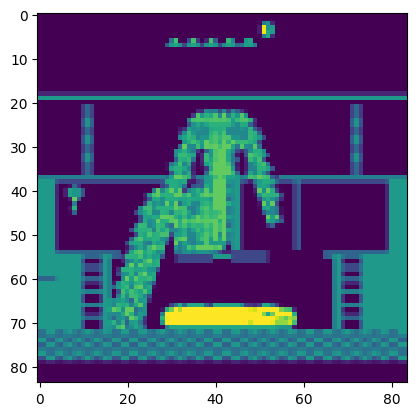

In [135]:
plt.imshow(vid.max(dim=0).values.numpy())

In [165]:
import atari_data

In [194]:
games = ['alien', 'amidar', 'assault', 'asterix', 'asteroids', 'atlantis', 'bank_heist', 'battle_zone', 'beam_rider', 'bowling', 'boxing', 'breakout', 'centipede', 'chopper_command', 'crazy_climber', 'demon_attack', 'double_dunk', 'enduro', 'fishing_derby', 'freeway', 'frostbite', 'gopher', 'gravitar', 'hero', 'ice_hockey', 'james_bond', 'kangaroo', 'krull', 'kung_fu_master', 'montezuma_revenge', 'ms_pacman', 'name_this_game', 'pong', 'private_eye', 'q_bert', 'river_raid', 'road_runner', 'robotank', 'seaquest', 'space_invaders', 'star_gunner', 'tennis', 'time_pilot', 'tutankham', 'up_n_down', 'venture', 'video_pinball', 'wizard_of_wor', 'zaxxon']
scores_random = [227.80, 5.80, 222.40, 210.00, 719.10, 12850.00, 14.20, 2360.00, 363.90, 23.10, 0.10, 1.70, 2090.90, 811.00, 10780.50, 152.10, -18.60, 0.00, -91.70, 0.00, 65.20, 257.60,  173.00, 1027.00, -11.20, 29.00, 52.00, 1598.00, 258.50, 0.00, 307.30, 2292.30, -20.70, 24.90, 163.90, 1338.50, 11.50, 2.20, 68.40, 148.00, 664.00, -23.80, 3568.00, 11.40, 533.40, 0.00, 16256.90, 563.50, 32.50]
scores_human = [6875.40, 1675.80, 1496.40, 8503.30, 13156.70, 29028.10, 734.40, 37800.00, 5774.70, 154.80, 4.30, 31.80, 11963.20, 9881.80, 35410.50, 3401.30, -15.50, 309.60, 5.50, 29.60, 4334.70, 2321.00, 2672.00, 25762.50, 0.90, 406.70, 3035.00, 2394.60, 22736.20, 4366.70, 15693.40, 4076.20, 9.30, 69571.30, 13455.00, 13513.30, 7845.00, 11.90, 20181.80, 1652.30, 10250.00, -8.90, 5925.00, 167.60, 9082.00, 1187.50, 17297.60, 4756.50, 9173.30]
game2scores = {key: (val1, val2) for key, val1, val2 in zip(games, scores_random, scores_human)}

In [180]:
a = atari_data._ATARI_DATA
b = game2scores

In [186]:
for game in set(a.keys()).union(set(b.keys())):
    if game in a and game in b:
        print(a[game][0], b[game][0], ' ------ ', a[game][1], b[game][1])
        print()

wizard_of_wor
563.5 563.5  ------  4756.5 4756.5

asterix
210.0 210.0  ------  8503.3 8503.3

robotank
2.2 2.2  ------  11.9 11.9

alien
227.8 227.8  ------  7127.7 6875.4

krull
1598.0 1598.0  ------  2665.5 2394.6

video_pinball
16256.9 16256.9  ------  17667.9 17297.6

assault
222.4 222.4  ------  742.0 1496.4

hero
1027.0 1027.0  ------  30826.4 25762.5

atlantis
12850.0 12850.0  ------  29028.1 29028.1

seaquest
68.4 68.4  ------  42054.7 20181.8

freeway
0.0 0.0  ------  29.6 29.6

frostbite
65.2 65.2  ------  4334.7 4334.7

kangaroo
52.0 52.0  ------  3035.0 3035.0

gravitar
173.0 173.0  ------  3351.4 2672.0

double_dunk
-18.6 -18.6  ------  -16.4 -15.5

time_pilot
3568.0 3568.0  ------  5229.2 5925.0

up_n_down
533.4 533.4  ------  11693.2 9082.0

battle_zone
2360.0 2360.0  ------  37187.5 37800.0

tutankham
11.4 11.4  ------  167.6 167.6

pong
-20.7 -20.7  ------  14.6 9.3

tennis
-23.8 -23.8  ------  -8.3 -8.9

amidar
5.8 5.8  ------  1719.5 1675.8

road_runner
11.5 11.5  --

In [228]:
env = make_env('Breakout', n_envs=16)

In [229]:
env.configure_eps_reward(encode_fn=idm, k=10)

In [234]:
env.num_envs

16

In [235]:
import gym.wrappers.normalize